# Import thư viện


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
# Bật tính năng để tắt các cảnh báo đi
import warnings
warnings.filterwarnings('ignore')

# Read data

In [3]:
train = pd.read_csv("train.csv")

In [4]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


 ==> có 38 /81 cột dạng số!

- Lọc feature thật sự cần thiết

In [7]:
feature = ["Id","MSZoning", "LotFrontage", "LotArea", "Street", "Alley", "LotShape", "Neighborhood", "Condition1", "BldgType", "OverallCond", "YearBuilt", "YearRemodAdd" 
,"TotalBsmtSF" ,"BsmtCond", "Heating", "HeatingQC", "CentralAir", "BedroomAbvGr", "KitchenAbvGr", "KitchenQual", "TotRmsAbvGrd", "Fireplaces", "FireplaceQu", 
"GarageType", "GarageCond", "PoolArea", "PoolQC", "Fence", "MoSold", "YrSold", "SaleType","SalePrice"]

| column  | description   
|---|---|
|MSZoning  |Khu vực| 
|LotFrontage| 	 mặt tiền|
|LotArea| 	diện tích 	|
|Street| 	đường | 	
|Alley| 	ngõ | 	
|LotShape| 	hình dạng |	
|Neighborhood| 	Vùng lân cận| 	
|Condition1| 	Điều kiện_1 |	
|BldgType| 	Loại nhà ở |	
|OverallCond| 	Đánh giá chung |	
|YearBuilt| 	Năm xây dựng| 	
|YearRemodAdd| 	 Thời gian sửa nhà |	
|TotalBsmtSF| 	diện tích tầng hầm |	
|BsmtCond| 	tình trạng chung của tầng hầm| 	
| Heating| 	Loại sưởi |	
|HeatingQC| 	Chất lượng và tình trạng sưởi ấm |	
|CentralAir| 	điều hòa| 	
|BedroomAbvGr| 	Số phòng ngủ |	
|KitchenAbvGr| 	Số lượng nhà bếp |	
|KitchenQual| 	Chất lượng nhà bếp| 	
|TotRmsAbvGrd| 	Tổng số phòng |	
|Fireplaces| 	Số lượng lò sưởi |	
|FireplaceQu| 	Chất lượng lò sưởi| 	
|GarageType| 	Vị trí nhà để xe |	
|GarageCond| 	 Tình trạng nhà để xe |	
|PoolArea| 	Diện tích hồ bơi| 	
|PoolQC| 	Chất lượng hồ bơi |	
|CaFencebin| 	Chất lượng hàng rào |	
|MoSold| 	Tháng đã bán| 	
|YrSold| 	Năm bán |	
|SaleType| 	Loại bán |	

In [8]:
df = train[feature]

In [9]:
df.head()

,Id,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,Neighborhood,Condition1,BldgType,...,FireplaceQu,GarageType,GarageCond,PoolArea,PoolQC,Fence,MoSold,YrSold,SaleType,SalePrice
0,1,RL,65.0,8450,Pave,NaN,Reg,CollgCr,Norm,1Fam,...,NaN,Attchd,TA,0,NaN,NaN,2,2008,WD,208500
1,2,RL,80.0,9600,Pave,NaN,Reg,Veenker,Feedr,1Fam,...,TA,Attchd,TA,0,NaN,NaN,5,2007,WD,181500
2,3,RL,68.0,11250,Pave,NaN,IR1,CollgCr,Norm,1Fam,...,TA,Attchd,TA,0,NaN,NaN,9,2008,WD,223500
3,4,RL,60.0,9550,Pave,NaN,IR1,Crawfor,Norm,1Fam,...,Gd,Detchd,TA,0,NaN,NaN,2,2006,WD,140000
4,5,RL,84.0,14260,Pave,NaN,IR1,NoRidge,Norm,1Fam,...,TA,Attchd,TA,0,NaN,NaN,12,2008,WD,250000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   MSZoning      1460 non-null   object 
 2   LotFrontage   1201 non-null   float64
 3   LotArea       1460 non-null   int64  
 4   Street        1460 non-null   object 
 5   Alley         91 non-null     object 
 6   LotShape      1460 non-null   object 
 7   Neighborhood  1460 non-null   object 
 8   Condition1    1460 non-null   object 
 9   BldgType      1460 non-null   object 
 10  OverallCond   1460 non-null   int64  
 11  YearBuilt     1460 non-null   int64  
 12  YearRemodAdd  1460 non-null   int64  
 13  TotalBsmtSF   1460 non-null   int64  
 14  BsmtCond      1423 non-null   object 
 15  Heating       1460 non-null   object 
 16  HeatingQC     1460 non-null   object 
 17  CentralAir    1460 non-null   object 
 18  BedroomAbvGr  1460 non-null 

# Vizualition

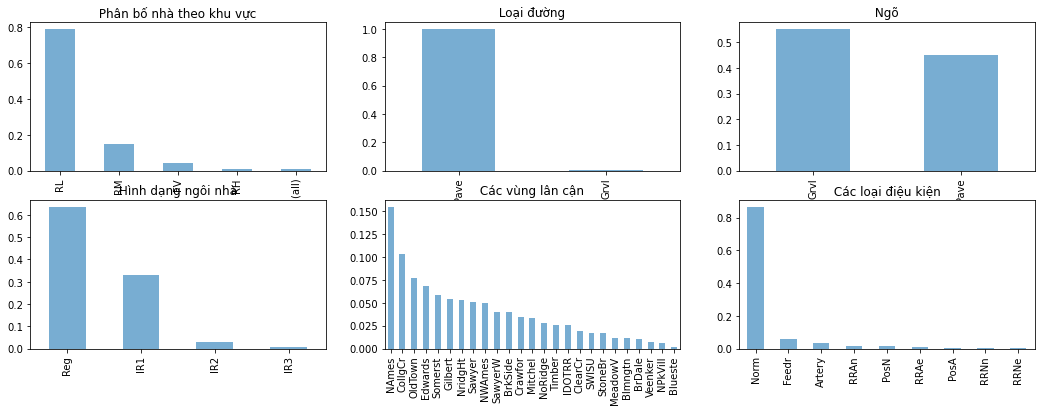

In [11]:
fig = plt.figure(figsize=(18,6))

plt.subplot2grid((2,3),(0,0))
df.MSZoning.value_counts(normalize=True).plot(kind = "bar", alpha = .6)
plt.title(" Phân bố nhà theo khu vực ")

plt.subplot2grid((2,3),(0,1))
df.Street.value_counts(normalize=True).plot(kind = "bar", alpha = .6)
plt.title(" Loại đường ")

plt.subplot2grid((2,3), (0,2))
df.Alley.value_counts(normalize= True).plot(kind = "bar", alpha=.6)
plt.title(" Ngõ ")

plt.subplot2grid((2,3),(1,0))
df.LotShape.value_counts(normalize=True).plot(kind = "bar", alpha = .6)
plt.title(" Hình dạng ngôi nhà ")

plt.subplot2grid((2,3),(1,1))
df.Neighborhood.value_counts(normalize=True).plot(kind = "bar", alpha = .6)
plt.title(" Các vùng lân cận ")

plt.subplot2grid((2,3), (1,2))
df.Condition1.value_counts(normalize= True).plot(kind = "bar", alpha=.6)
plt.title(" Các loại điệu kiện ")

plt.show()


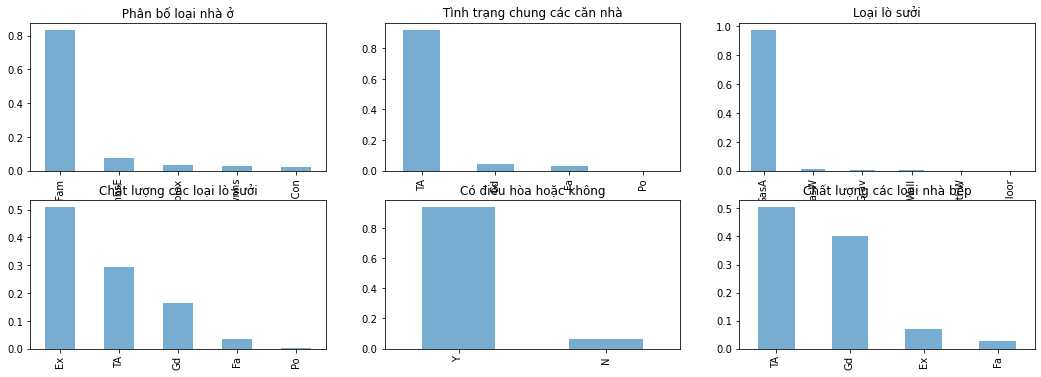

In [12]:
fig = plt.figure(figsize=(18,6))

plt.subplot2grid((2,3),(0,0))
df.BldgType.value_counts(normalize=True).plot(kind = "bar", alpha = .6)
plt.title(" Phân bố loại nhà ở ")

plt.subplot2grid((2,3),(0,1))
df.BsmtCond.value_counts(normalize=True).plot(kind = "bar", alpha = .6)
plt.title(" Tình trạng chung các căn nhà ")

plt.subplot2grid((2,3), (0,2))
df.Heating.value_counts(normalize= True).plot(kind = "bar", alpha=.6)
plt.title("Loại lò sưởi")

plt.subplot2grid((2,3),(1,0))
df.HeatingQC.value_counts(normalize=True).plot(kind = "bar", alpha = .6)
plt.title("Chất lượng các loại lò sưởi")

plt.subplot2grid((2,3),(1,1))
df.CentralAir.value_counts(normalize=True).plot(kind = "bar", alpha = .6)
plt.title("Có điều hòa hoặc không")

plt.subplot2grid((2,3), (1,2))
df.KitchenQual.value_counts(normalize= True).plot(kind = "bar", alpha=.6)
plt.title("Chất lượng các loại nhà bếp")

plt.show()


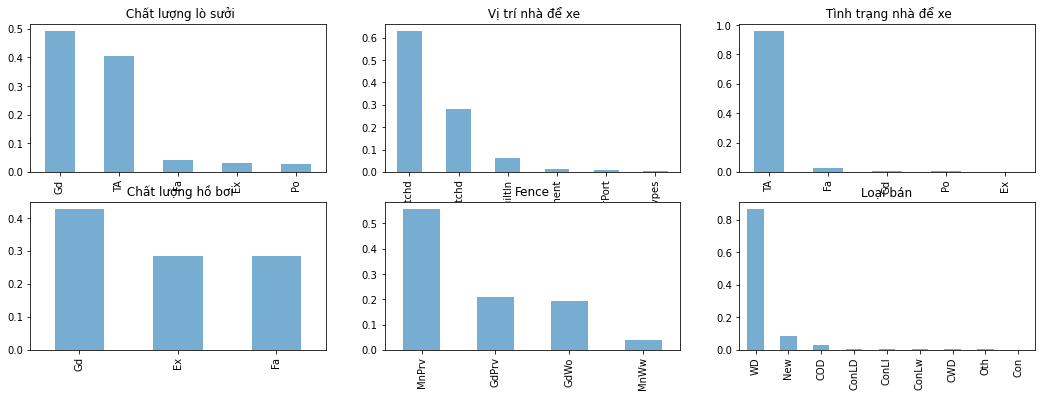

In [13]:
fig = plt.figure(figsize=(18,6))

plt.subplot2grid((2,3),(0,0))
df.FireplaceQu.value_counts(normalize=True).plot(kind = "bar", alpha = .6)
plt.title(" Chất lượng lò sưởi")

plt.subplot2grid((2,3),(0,1))
df.GarageType.value_counts(normalize=True).plot(kind = "bar", alpha = .6)
plt.title(" Vị trí nhà để xe")

plt.subplot2grid((2,3), (0,2))
df.GarageCond.value_counts(normalize= True).plot(kind = "bar", alpha=.6)
plt.title(" Tình trạng nhà để xe")

plt.subplot2grid((2,3),(1,0))
df.PoolQC.value_counts(normalize=True).plot(kind = "bar", alpha = .6)
plt.title(" Chất lượng hồ bơi")

plt.subplot2grid((2,3),(1,1))
df.Fence.value_counts(normalize=True).plot(kind = "bar", alpha = .6)
plt.title("Fence")


plt.subplot2grid((2,3), (1,2))
df.SaleType.value_counts(normalize= True).plot(kind = "bar", alpha=.6)
plt.title("Loại bán")

plt.show()


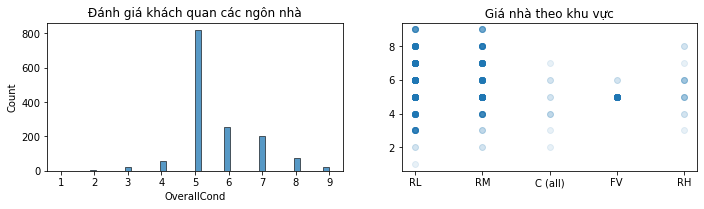

In [14]:
fig = plt.figure(figsize=(18,6))

plt.subplot2grid((2,3),(0,1))
sns.histplot(data = df, x = df.OverallCond)
plt.title(" Đánh giá khách quan các ngôn nhà ")

plt.subplot2grid((2,3),(0,2))
plt.scatter(df.MSZoning,df.OverallCond, alpha=.1)
plt.title(" Giá nhà theo khu vực ")

plt.show()

-> Đa số các ngôi nhà thuộc tầm trung, tuy nhiên vẫn còn rất ngôi nhà rất tốt theo thang điểm 10.

=> Những căn nhà dược đánh giá cao tập trung nhiều ở khu RL va RM

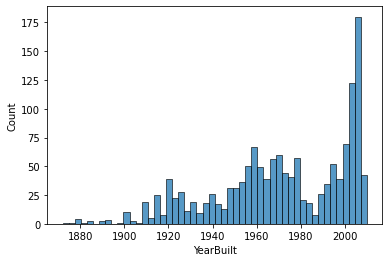

In [15]:
sns.histplot(data = df, x = df.YearBuilt, bins=50);

-> Các ngôi nhà phần lớn được xây dựng khoảng [1955 - 1980] và đạt đỉnh điểm vào [2001-2002]

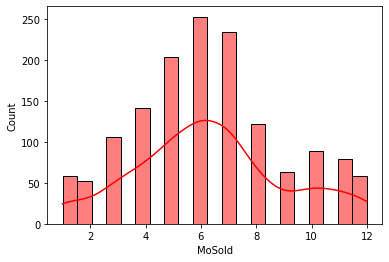

In [16]:
sns.histplot(df.MoSold, kde=True , color="r");

-> Phần lớn lượng người mua nhà chủ yếu vào giữa năm khoảng tháng [5, 7]

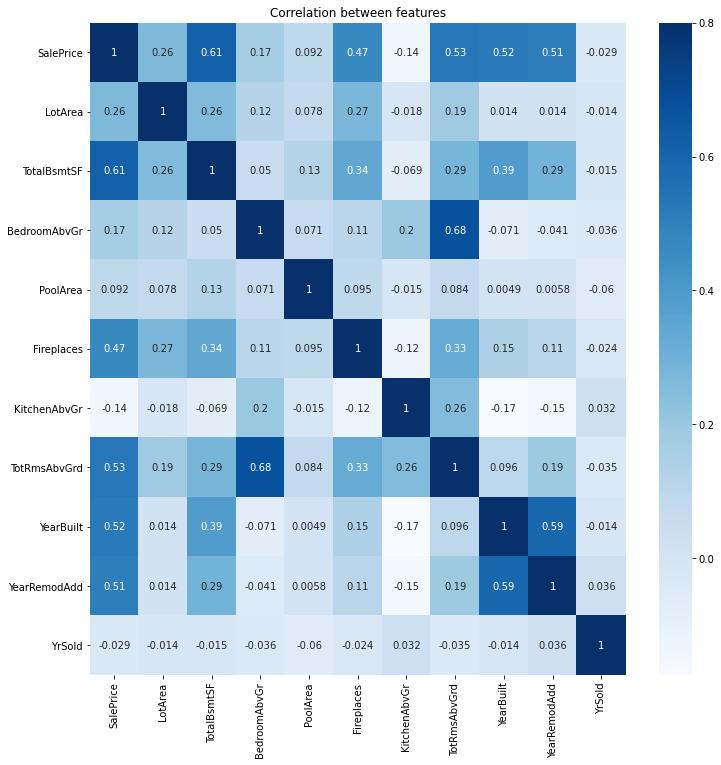

In [17]:
corrMatrix=df[["SalePrice","LotArea","TotalBsmtSF","BedroomAbvGr","PoolArea","Fireplaces","KitchenAbvGr",
                  "TotRmsAbvGrd","YearBuilt","YearRemodAdd","YrSold"]].corr()


plt.figure(figsize=(12, 12))
sns.heatmap(corrMatrix, vmax=.8, annot=True,cmap="Blues")
plt.title("Correlation between features");

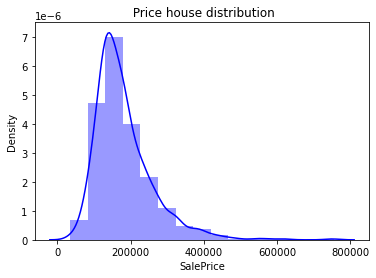

In [18]:
sns.distplot(df["SalePrice"],bins= 15, color="b")
plt.title(" Price house distribution");

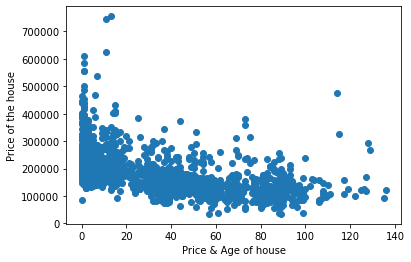

In [19]:
df["Price_age"] = df["YrSold"] - df["YearBuilt"]
plt.scatter(df["Price_age"], df["SalePrice"])
plt.ylabel("Price of the house")
plt.xlabel("Price & Age of house");

--> Giá nhà giảm xuống với tuổi của nó

# Pre-Processing

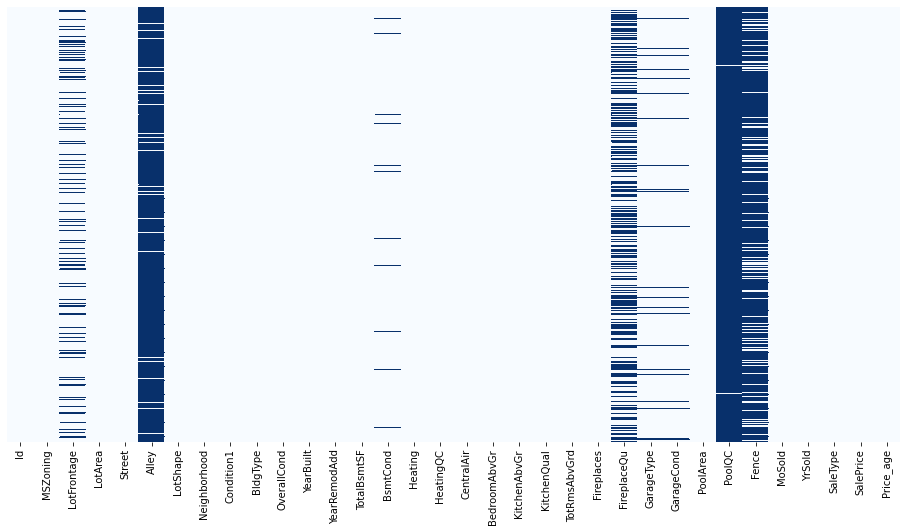

In [20]:
plt.figure(figsize=(16,8))
sns.heatmap(df.isna(), cmap="Blues", cbar=False, yticklabels=False);

=> Nhìn vào biểu đồ heatmap ở trên ta thấy như sau:

Có 3 cột:Alley, PoolQC, Fence là có dữ liệu bị null. Cột Cabin có số dữ liệu null nhiều nhất

In [21]:
# Cụ thể % missing data của từng feature
for col in df.columns:
    missing_data = df[col].isna().sum()
    percent_missing = missing_data / len(df) *100
    print(f" Columns {col} has : {percent_missing} % missing data ")

 Columns Id has : 0.0 % missing data 
 Columns MSZoning has : 0.0 % missing data 
 Columns LotFrontage has : 17.73972602739726 % missing data 
 Columns LotArea has : 0.0 % missing data 
 Columns Street has : 0.0 % missing data 
 Columns Alley has : 93.76712328767123 % missing data 
 Columns LotShape has : 0.0 % missing data 
 Columns Neighborhood has : 0.0 % missing data 
 Columns Condition1 has : 0.0 % missing data 
 Columns BldgType has : 0.0 % missing data 
 Columns OverallCond has : 0.0 % missing data 
 Columns YearBuilt has : 0.0 % missing data 
 Columns YearRemodAdd has : 0.0 % missing data 
 Columns TotalBsmtSF has : 0.0 % missing data 
 Columns BsmtCond has : 2.5342465753424657 % missing data 
 Columns Heating has : 0.0 % missing data 
 Columns HeatingQC has : 0.0 % missing data 
 Columns CentralAir has : 0.0 % missing data 
 Columns BedroomAbvGr has : 0.0 % missing data 
 Columns KitchenAbvGr has : 0.0 % missing data 
 Columns KitchenQual has : 0.0 % missing data 
 Columns Tot

In [22]:
# x = ["LotFrontage", "Alley", "BsmtCond", "FireplaceQu", "GarageType", "GarageCond","PoolQC","Fence"]
# len(x)

## Missing data using pandas

In [23]:
# missing data 
df.LotFrontage = df.LotFrontage.fillna(df.LotFrontage.mean())

# Điện những giá trị xuất hiện nhiều nhất!
df.Alley = df.Alley.fillna("Grvl")
df.BsmtCond = df.BsmtCond.fillna("TA")
df.FireplaceQu = df.FireplaceQu.fillna("Gd")
df.GarageType = df.GarageType.fillna("Attchd")
df.GarageCond = df.GarageCond.fillna("TA")

df.PoolQC = df.PoolQC.fillna("Gd")
df.Fence = df.Fence.fillna("MnPrv")

In [24]:
df.head()

,Id,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,Neighborhood,Condition1,BldgType,...,GarageType,GarageCond,PoolArea,PoolQC,Fence,MoSold,YrSold,SaleType,SalePrice,Price_age
0,1,RL,65.0,8450,Pave,Grvl,Reg,CollgCr,Norm,1Fam,...,Attchd,TA,0,Gd,MnPrv,2,2008,WD,208500,5
1,2,RL,80.0,9600,Pave,Grvl,Reg,Veenker,Feedr,1Fam,...,Attchd,TA,0,Gd,MnPrv,5,2007,WD,181500,31
2,3,RL,68.0,11250,Pave,Grvl,IR1,CollgCr,Norm,1Fam,...,Attchd,TA,0,Gd,MnPrv,9,2008,WD,223500,7
3,4,RL,60.0,9550,Pave,Grvl,IR1,Crawfor,Norm,1Fam,...,Detchd,TA,0,Gd,MnPrv,2,2006,WD,140000,91
4,5,RL,84.0,14260,Pave,Grvl,IR1,NoRidge,Norm,1Fam,...,Attchd,TA,0,Gd,MnPrv,12,2008,WD,250000,8


## Encode categorical data

In [25]:
# Encode independent variable(X)

In [61]:
features = ["MSZoning","Condition1", "GarageType","PoolArea","LotArea","LotFrontage", "TotRmsAbvGrd", "YearBuilt", 
     "YearRemodAdd", "Fireplaces", "TotRmsAbvGrd" , "YrSold","KitchenAbvGr"]
X = df[features].values
y = df["SalePrice"].values

In [62]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[0,1,2])], remainder="passthrough")
X = ct.fit_transform(X)


In [63]:
X[0]

array([0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0, 8450, 65.0, 8, 2003, 2003, 0,
       8, 2008, 1], dtype=object)

In [64]:
X[0][19:]

array([0.0, 0, 8450, 65.0, 8, 2003, 2003, 0, 8, 2008, 1], dtype=object)

# Splitting Data into Training and Test Sets & feature scaling

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [151]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,20:] = sc.fit_transform(X_train[:,20:])
X_test[:,20:] = sc.fit_transform(X_test[:,20:])


In [152]:
X_train[0]

array([0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, -0.07099283776824213,
       -0.21289571021689285, -0.012881785906024682, -0.9645659090752338,
       -0.45546896345337673, -1.3460630279925614, -0.9585921495629571,
       -0.9645659090752338, 1.650065273922175, -0.21275711248874465],
      dtype=object)

In [153]:
X_test[0]

array([0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, -0.05862103817605509,
       -0.24021622582239652, 0.04503699805984406, -0.20930214446550224,
       -0.33599407142933596, 0.9000897847981795, -0.922263418289438,
       -0.20930214446550224, -1.3372576772098625, -0.20701966780270614],
      dtype=object)

# Modeling

In [166]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

# Prediction

In [167]:
y_preds =reg.predict(X_test)

In [168]:
pd.DataFrame({'y': y_test, 'y_preds': y_preds, 'lech': (y_test - y_preds)}).head()

,y,y_preds,lech
0,154500,166816.0,-12316.0
1,325000,307368.0,17632.0
2,115000,102716.0,12284.0
3,159000,157152.0,1848.0
4,315500,245240.0,70260.0


# Evaluation

In [169]:
# Test the model on the testing set and evaluate the performance
score = reg.score(X_test, y_test)
print(score)

0.6595254815754332


In [173]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_test,y_preds))
print(f'RMSE = {rmse}')

RMSE = 51103.332783208665
